In [1]:
import LMRt
import numpy as np
import pandas as pd
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import mquantiles
from tqdm import tqdm
import pickle
from matplotlib import gridspec
import os

In [2]:
# SEA on iCESM simualted NHMT

events_G08 = [1600, 1641, 1673, 1693, 1815, 1835] 
with open(f'../data/gcm_sims/nhmt_iCESM.pkl', 'rb') as f:
    nhmt_ann, year_ann = pickle.load(f)
    
with open(f'../data/gcm_sims/nhmt_iCESM_JJA.pkl', 'rb') as f:
    nhmt_JJA, year_JJA = pickle.load(f)
    
sea_iCESM_nhmt_ann = LMRt.utils.sea(
    nhmt_ann, events_G08, preyr=5, postyr=10, start_yr=year_ann[0]
)
sea_iCESM_nhmt_JJA = LMRt.utils.sea(
    nhmt_JJA, events_G08, preyr=5, postyr=10, start_yr=year_JJA[0]
)

In [3]:
# SERA on LMR pseudoproxy tests

exp_namelist = [
    'pseudo.pages2k.tree.trw',
    'pseudo.pages2k.tree.trw_NA50',
    'pseudo.pages2k.tree.trw_NH50',
    'pseudo.pages2k.tree.trw_JJAproxy',
    'pseudo.pages2k.tree.trw_JJAproxy_JJA',
    'pseudo.pages2k.tree.trw_smoother',
    'pseudo.pages2k.tree.trw_smoother_noise',
]

sea_lmr = {}
for exp_tag in exp_namelist:
    with open(f'../data/lmr_recons/nhmt_LMRt_{exp_tag}.pkl', 'rb') as f:
        nhmt, to = pickle.load(f)
    
    sea_lmr[exp_tag] = LMRt.utils.sea(nhmt, events_G08, preyr=5, postyr=10, verbose=False)

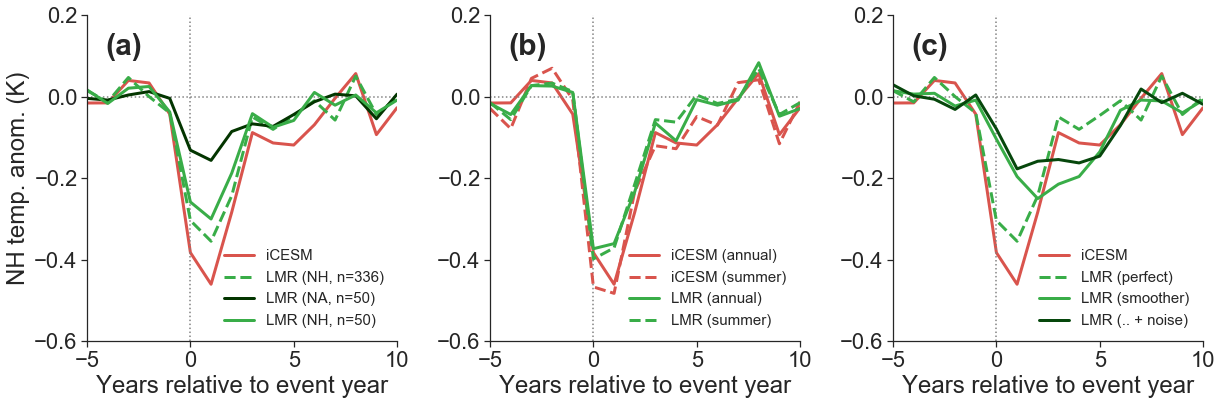

In [4]:
# plot Fig. 3

sns.set(style='ticks', font_scale=2)
fig = plt.figure(figsize=[20, 6])
gs = gridspec.GridSpec(1, 3)                                                   
gs.update(wspace=0.3, hspace=0.3)
ylabel = 'NH temp. anom. (K)'
lgd_fontsize = 15

# left
ax1 = plt.subplot(gs[0])

exp_dict = {
    'pseudo.pages2k.tree.trw': {'clr': sns.xkcd_rgb['medium green'], 'lb': 'LMR (NH, n=336)', 'ls':'--'},
    'pseudo.pages2k.tree.trw_NA50': {'clr': sns.xkcd_rgb['dark green'], 'lb': 'LMR (NA, n=50)', 'ls':'-'},
    'pseudo.pages2k.tree.trw_NH50': {'clr': sns.xkcd_rgb['medium green'], 'lb': 'LMR (NH, n=50)', 'ls':'-'},
}

alpha = 0.3
LMRt.visual.plot_sea_res(sea_iCESM_nhmt_ann, color=sns.xkcd_rgb['pale red'], xticks=[-5, 0, 5, 10], ylabel=ylabel,
                                   ls='-', label='iCESM', shade_alpha=alpha, fig=fig, ax=ax1)

for exp_name, style_dict in exp_dict.items():
    ax1.plot(sea_lmr[exp_name]['composite_yr'], sea_lmr[exp_name]['composite_qs'][1], ls=style_dict['ls'],
            label=style_dict['lb'], lw=3, color=style_dict['clr'])
    ax1.set_ylim([-0.6, 0.2])
    ax1.set_xlim([-5, 10])
    
ax1.legend(frameon=False, loc='lower right', bbox_to_anchor=[1, 0], fontsize=lgd_fontsize)

# center
ax2 = plt.subplot(gs[1])
exp_dict = {
    'pseudo.pages2k.tree.trw_JJAproxy': {'clr': sns.xkcd_rgb['medium green'], 'lb': 'LMR (annual)', 'ls':'-'},
    'pseudo.pages2k.tree.trw_JJAproxy_JJA': {'clr': sns.xkcd_rgb['medium green'], 'lb': 'LMR (summer)', 'ls':'--'},
}

LMRt.visual.plot_sea_res(sea_iCESM_nhmt_ann, color=sns.xkcd_rgb['pale red'], xticks=[-5, 0, 5, 10], ylabel='',
                                   ls='-', label='iCESM (annual)', shade_alpha=alpha, fig=fig, ax=ax2)
ax2.plot(sea_iCESM_nhmt_JJA['composite_yr'], sea_iCESM_nhmt_JJA['composite'], '--', label='iCESM (summer)', lw=3, color=sns.xkcd_rgb['pale red'])

for exp_name, style_dict in exp_dict.items():
    ax2.plot(sea_lmr[exp_name]['composite_yr'], sea_lmr[exp_name]['composite_qs'][1], ls=style_dict['ls'],
            label=style_dict['lb'], lw=3, color=style_dict['clr'])
    ax2.set_ylim([-0.6, 0.2])
    ax2.set_xlim([-5, 10])
    
ax2.legend(frameon=False, loc='lower right', bbox_to_anchor=[1, 0], fontsize=lgd_fontsize)

# right
ax3 = plt.subplot(gs[2])
exp_dict = {
    'pseudo.pages2k.tree.trw': {'clr': sns.xkcd_rgb['medium green'], 'lb': 'LMR (perfect)', 'ls':'--'},
    'pseudo.pages2k.tree.trw_smoother': {'clr': sns.xkcd_rgb['medium green'], 'lb': 'LMR (smoother)', 'ls':'-'},
    'pseudo.pages2k.tree.trw_smoother_noise': {'clr': sns.xkcd_rgb['forest green'], 'lb': 'LMR (.. + noise)', 'ls':'-'},
}

LMRt.visual.plot_sea_res(sea_iCESM_nhmt_ann, color=sns.xkcd_rgb['pale red'], xticks=[-5, 0, 5, 10], ylabel='',
                                   ls='-', label='iCESM', shade_alpha=alpha, fig=fig, ax=ax3)

for exp_name, style_dict in exp_dict.items():
    ax3.plot(sea_lmr[exp_name]['composite_yr'], sea_lmr[exp_name]['composite_qs'][1], ls=style_dict['ls'],
            label=style_dict['lb'], lw=3, color=style_dict['clr'])
    ax3.set_ylim([-0.6, 0.2])
    ax3.set_xlim([-5, 10])
    
ax3.legend(frameon=False, loc='lower right', bbox_to_anchor=[1, 0], fontsize=lgd_fontsize)


LMRt.visual.setlabel(ax1, '(a)', prop={'weight': 'bold', 'size': 30}, bbox_to_anchor=[0, 1])
LMRt.visual.setlabel(ax2, '(b)', prop={'weight': 'bold', 'size': 30}, bbox_to_anchor=[0, 1])
LMRt.visual.setlabel(ax3, '(c)', prop={'weight': 'bold', 'size': 30}, bbox_to_anchor=[0, 1])

fig.savefig('../figs/Fig-3.pdf', bbox_inches='tight')